# Question 3


(a) Load the data regTrain.txt and use least squares regression to fit functions fk with
the maximal frequency k = 1, 3, 5, . . . , 17. Plot the 9 resulting functions together with
the training data into a single figure. Explain the effect of the increasing k on the
fitting function fk

In [32]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import numpy.linalg as lg

In [196]:
train_data= np.loadtxt('regTrain.txt')
test_data=np.loadtxt('regTest.txt')
X=train_data[:,0]
Y=train_data[:,1]


In [197]:
def get_fi_Fourier(X,k):
    # print(X)
    lenX=len(X)
    fi=np.ones((lenX,1))
    for l in range(1,k+1):
        tmp=np.cos(2*pi*l*X)/l
        fi=np.append(fi,tmp.reshape(lenX,1),axis=1)
        tmp=np.sin(2*pi*l*X)/l
        fi=np.append(fi,tmp.reshape(lenX,1),axis=1)
    return fi

In [198]:
def get_W(fi,Y):
    w=lg.inv(fi.T.dot(fi)).dot(fi.T).dot(Y)
    return w

In [199]:
def get_W_regular(fi,Y,labmda):
    lenI=len(fi[0])
    w=lg.inv(fi.T.dot(fi)+np.eye(lenI)*labmda).dot(fi.T).dot(Y)
    return w   

In [200]:
def get_predict(X,w,k):
    predict_y=0
    fi=get_fi_Fourier(X,k)
#     print(fi)
    predict_y=fi.dot(w)
    return predict_y

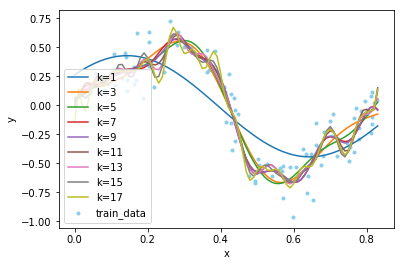

In [201]:

X_test=np.arange(0,0.84,0.01)
# print(X_test)
for k in range(1,18,2):
    fi=get_fi_Fourier(X,k)
#     print("fi1=",fi[1,:])
    w=get_W(fi,Y)
#     print(w)
    predict_y=get_predict(X_test,w,k)
    plt.plot(X_test,predict_y,label="k=%s"%k)
    
plt.scatter(X,Y,label="train_data",marker='.',c="#87CEEB")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
    

From the figure we can see that increasing k makes the model less smooth.


(b) For each k, compute the root mean square error ERMS =
√
(2E(w)/N) on both, training
and test data, as a function of maximum frequency k. Describe what you see and try
to explain your observation in your own words.

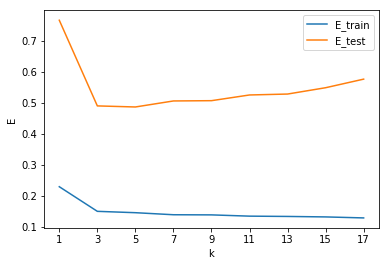

In [203]:
E_train=np.zeros(9)
E_test=np.zeros(9)
for k in range(1,18,2):
    fi=get_fi_Fourier(X,k)
    w=get_W(fi,Y)
    predict_y=get_predict(train_data[:,0],w,k)
    E=np.sqrt(np.sum(np.square(predict_y-train_data[:,1]))/N)
    E_train[k//2]=E    
    
    predict_y=get_predict(test_data[:,0],w,k)
    E=np.sqrt(np.sum(np.square(predict_y-test_data[:,1]))/N)
    E_test[k//2]=E

ks=np.arange(1,18,2)
# print(ks)
# print(E_train)
# print(E_test)
plt.plot(ks,E_train,label="E_train")
plt.plot(ks,E_test,label="E_test")
plt.xlabel("k")
plt.ylabel("E")
plt.xticks(ks)
plt.legend()
plt.show()

We can see that the error falls steeply from k=1 to k=3, because when k=1, the model doesn't have enough parameter.
For k>3, the error of train data decreases while the error of test data increases. That's because bigger k brings too many parameters, which causes overfitting.


(c) Extend your code to incorporate a prior on the weights of the regression function to
perform Ridge Regression. Repeat the above tasks with various regularization weights
λ. Which value gives good results? Discuss the difference in terms of the fitting
functions and the training and test errors.

In [326]:
def ridge_regression(labmda):
    X_test=np.arange(0,0.85,0.01)
    # print(X_test)
    for k in range(1,18,2):
        fi=get_fi_Fourier(X,k)
        w=get_W_regular(fi,Y,labmda)
        predict_y=get_predict(X_test,w,k)
#         plt.plot(X_test,predict_y,label="k=%s"%k)

#     plt.scatter(X,Y,label="train_data",marker='.',c="#87CEEB")
#     plt.title("λ=%s"%labmda)
#     plt.xlabel("x")
#     plt.ylabel("y")
#     plt.legend()
#     plt.show()
    E_train=np.zeros(9)
    E_test=np.zeros(9)
    for k in range(1,18,2):
        fi=get_fi_Fourier(X,k)
        w=get_W_regular(fi,Y,labmda)
        predict_y=get_predict(train_data[:,0],w,k)
        E=np.sqrt(np.sum(np.square(predict_y-train_data[:,1]))/N)
        E_train[k//2]=E    

        predict_y=get_predict(test_data[:,0],w,k)
        E=np.sqrt(np.sum(np.square(predict_y-test_data[:,1]))/N)
        E_test[k//2]=E

#         E_train[k//2]=get_E_regular(train_data[:,0],train_data[:,1],k,labmda)
#         E_test[k//2]=get_E_regular(test_data[:,0],test_data[:,1],k,labmda)

#     ks=np.arange(1,18,2)

#     plt.plot(ks,E_train,label="E_train")
#     plt.plot(ks,E_test,label="E_test")
#     plt.xlabel("k")
#     plt.ylabel("E")
#     plt.xticks(ks)
#     plt.title("λ=%s"%labmda)
#     plt.legend()
#     plt.show()
#     print(E_test)
    return E_test[5]

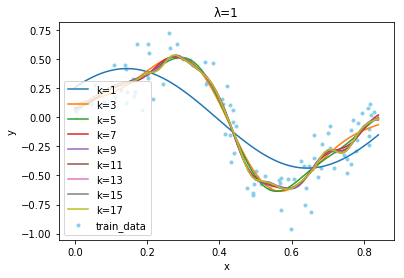

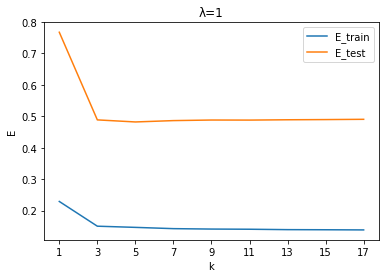

[0.76728961 0.48860377 0.48202709 0.48632974 0.48815282 0.48793971
 0.48897642 0.48957548 0.4904352 ]


In [288]:
ridge_regression(1)

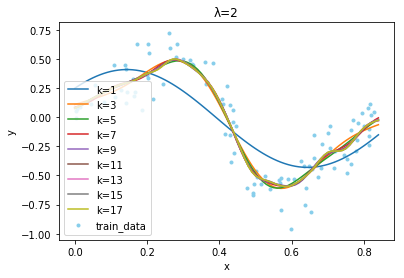

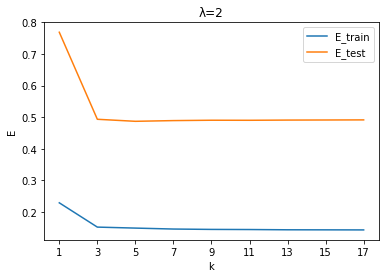

0.49032418601817174


In [234]:
ridge_regression(2)

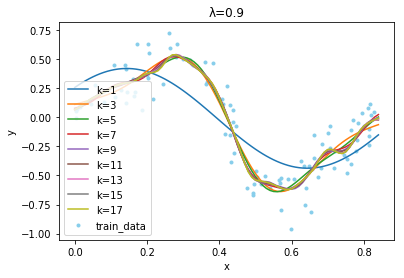

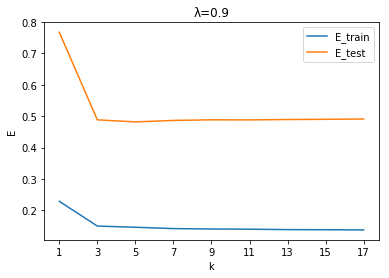

0.4882915648833346


In [244]:
ridge_regression(0.9)

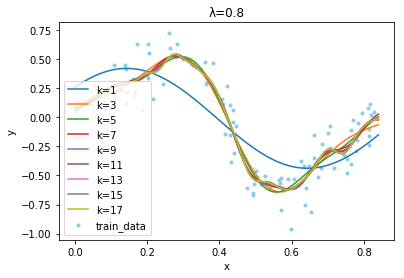

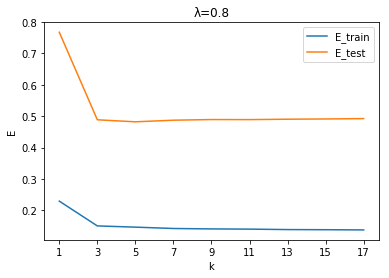

0.488817082384056


In [243]:
ridge_regression(0.8)

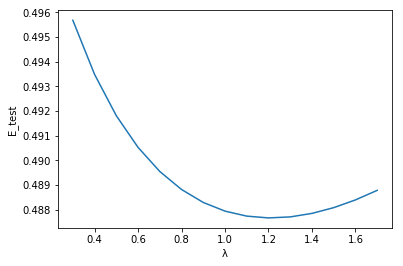

In [339]:
labms=np.arange(0.3,1.8,0.1)
Nd=len(labms)
E_test=np.zeros(Nd)
for i in range(Nd):
    E_test[i]=ridge_regression(labms[i])
    
plt.plot(labms,E_test)
plt.xlabel("λ")
plt.ylabel("E_test")
plt.show()

λ=1.2 gives the best result.  
Compared with original model, small λ makes little difference. But too large λ leads to underfitting.

# Question 4


(a) In the lecture it has been discussed that Ridge Regression can be combined with kernels.
Extend the regression for the previous task such that it makes use of a kernel. For a
first experiment use the squared exponential kernel:  



In [176]:
def kx_exp(X,newx,l):
    N=len(X)
    kx=np.zeros(N)
    for i in range(N):
        kx[i]=np.exp(-np.square(X[i]-newx)/np.square(l))
    return kx

In [332]:
def kernel_exp(l=0.1,labmda=1):
    #################train###############
    N=len(X)
    K=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            K[i,j]=np.exp(-np.square(X[i]-X[j])/np.square(l))
    # print(K)
    a=lg.inv(K+np.eye(N)*labmda).dot(Y)
    # print(a)
    ##################test################
    Y_predict=np.zeros(N)
    for i in range(N):
        Y_predict[i]=kx_exp(X,train_data[i,0],l).dot(a)
    E_train_exp=np.sqrt(np.sum(np.square(Y_predict-train_data[:,1]))/N)
    
    X_test=test_data[:,0]
    N=len(test_data)
    Y_predict=np.zeros(N)
    kk=np.zeros(N)
    for i in range(N):
        Y_predict[i]=kx_exp(X,test_data[i,0],d).dot(a)
    E_test_exp=np.sqrt(np.sum(np.square(Y_predict-test_data[:,1]))/N)
    
#     plt.scatter(X,Y)
#     plt.plot(X_test,Y_predict)
#     plt.show()
#     E_test_exp=np.sqrt(np.sum(np.square(Y_predict-test_data[:,1]))/N)
    print(E_test_exp)
    return (E_train_exp,E_test_exp)
    # for i in range(len(Y_predict)):
    #     print(Y_predict[i],'---',test_data[:,1][i])

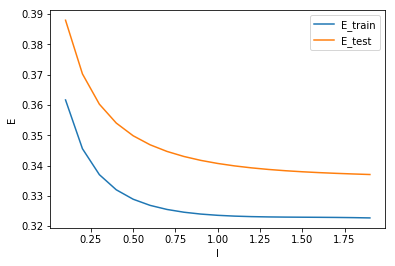

In [343]:
ls=np.arange(0.1,2,0.1)
Nd=len(ls)
E_train_exp=np.zeros(Nd)
E_test_exp=np.zeros(Nd)

for i in range(0,Nd):
    (E_train_exp[i],E_test_exp[i])=kernel_poly(ls[i],labmda=1.2)

plt.plot(ls,E_train_exp,label="E_train")
plt.plot(ls,E_test_exp,label="E_test")
plt.legend()
plt.xlabel("l")
plt.ylabel("E")
# print(E_train_exp)
plt.show()


(b) Exchange the kernel for the polynomial kernel:  
<center>k(x, y) = (x ∗ y + 1)d  </center>
What is the effect of the parameter d?

In [264]:
def kx_poly(X,newx,d):
    N=len(X)
    kx=np.zeros(N)
    for i in range(N):
        kx[i]=(X[i]*newx+1)**d
    return kx

In [310]:
def kernel_poly(d=10,labmda=1):
#################train###############
    N=len(X)
    K=np.zeros((N,N))
    #default l=1
    for i in range(N):
        for j in range(N):
            K[i,j]=(X[i]*X[j]+1)**d
    # print(K)
    a=lg.inv(K+np.eye(N)*labmda).dot(Y)
    # print(a)
    ##################test################
    Y_predict=np.zeros(N)
    for i in range(N):
        Y_predict[i]=kx_poly(X,train_data[i,0],d).dot(a)
    E_train_exp=np.sqrt(np.sum(np.square(Y_predict-train_data[:,1]))/N)
    
    X_test=test_data[:,0]
    N=len(test_data)
    Y_predict=np.zeros(N)
    kk=np.zeros(N)
    for i in range(N):
        Y_predict[i]=kx_poly(X,test_data[i,0],d).dot(a)
    E_test_exp=np.sqrt(np.sum(np.square(Y_predict-test_data[:,1]))/N)
#     plt.scatter(X,Y)
#     plt.plot(X_test,Y_predict)
#     plt.show()
#     print(E_test_exp)
#     print((E_train_exp,E_test_exp))
    return (E_train_exp,E_test_exp)
# for i in range(len(Y_predict)):
#     print(Y_predict[i],'---',test_data[:,1][i])

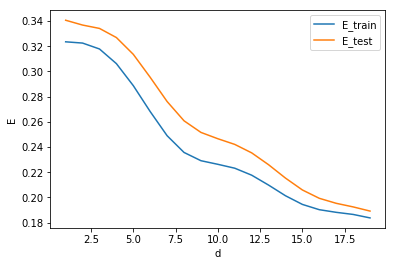

In [342]:
ds=np.arange(1,20)
Nd=len(ds)
E_train_exp=np.zeros(Nd)
E_test_exp=np.zeros(Nd)

for i in range(0,Nd):
    (E_train_exp[i],E_test_exp[i])=kernel_poly(ds[i],labmda=1.2)

plt.plot(ds,E_train_exp,label="E_train")
plt.plot(ds,E_test_exp,label="E_test")
plt.legend()
plt.xlabel("d")
plt.ylabel("E")
# print(E_train_exp)
plt.show()

